# daily_coding

Starting a Journey now, where I want to become more fluent in Python and also want to try out different features of JupyterLab.

In [122]:
from ipywidgets import interact
from IPython.display import IFrame, YouTubeVideo
import ipywidgets as widgets

import os
import sys

import numpy as np
import scipy
import pandas as pd
import sklearn
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [123]:
%matplotlib inline

In [124]:
%load_ext pycodestyle_magic

The pycodestyle_magic extension is already loaded. To reload it, use:
  %reload_ext pycodestyle_magic


In [125]:
%flake8_on --ignore E302,E305,W191

In [126]:
print(sys.version)
print(sys.version_info)

3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]
sys.version_info(major=3, minor=8, micro=3, releaselevel='final', serial=0)


In [127]:
!which anaconda

/Users/nilsseitz/anaconda3/bin/anaconda


In [128]:
link = 'https://data-flair.training/blogs/python-project-ideas/'
MBP_WIDTH, MBP_HEIGHT = 2880, 1800  # MBP DISPLAY
FITTING_WIDTH = 1150

IFrame(link, width=FITTING_WIDTH, height=(
    FITTING_WIDTH * MBP_HEIGHT) / MBP_WIDTH)

Just as an inspiration, in case no project comes to mind.

The first project is:

## ASCIIART
Read in a picture with *opencv* to *numpy* arrays and map it to **UNICODE** character.
Idea is to convert the rgb pictures to greyscale and then make "bucket" of Greyscale-Ranges (e.g. {0..25 : ' ', 26..50 : '.', ... , 230..255 : u'\u2588'}

In [129]:
print(u'\u2588')  # BlackSquare

█


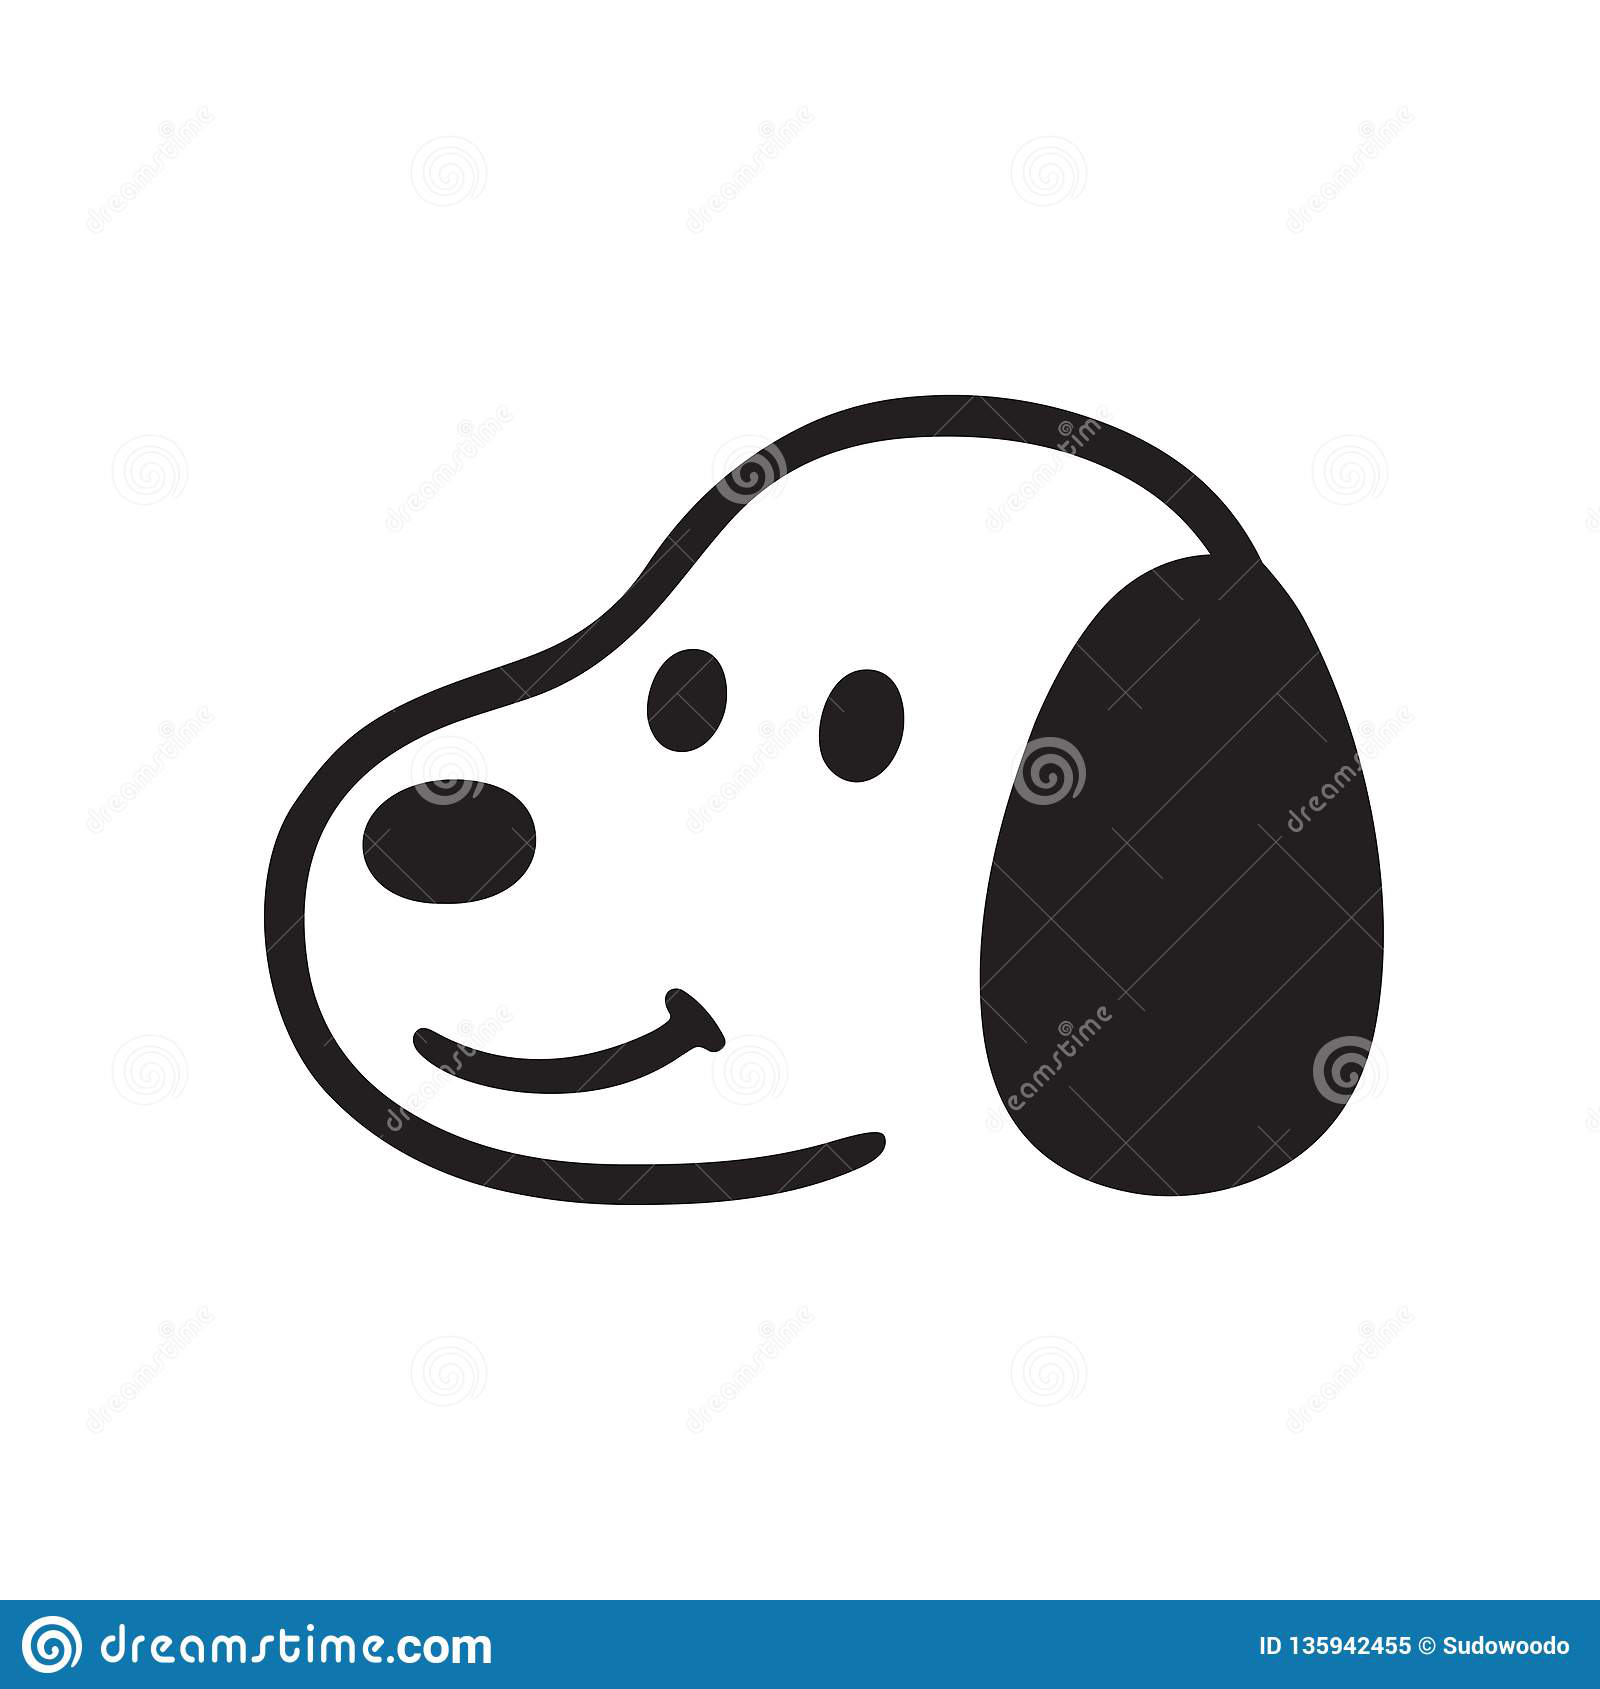

5:80: E501 line too long (131 > 79 characters)


In [130]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://thumbs.dreamstime.com/z/simple-cartoon-dog-face-drawing-cute-black-white-isolated-vector-illustration-135942455.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content))

picturename = 'snoopy.png'
img.save(picturename)

img

In [150]:
image = cv2.imread(picturename, cv2.IMREAD_UNCHANGED)
image.shape

(1689, 1600, 3)

In [170]:
scale_percent = 5  # percent of original size
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

image_resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
image_grey = color.rgb2gray(image_resized)
image_grey  # 2D-Numpy Array of GreyValues

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.4814051 , 0.75069294, 0.73527451, ..., 0.60680706, 0.52799569,
        0.4814051 ],
       [0.48085451, 0.74368314, 0.75070784, ..., 0.54651725, 0.5176    ,
        0.48085451],
       [0.48085451, 0.49543961, 0.56303686, ..., 0.48085451, 0.48085451,
        0.48085451]])

In [171]:
image_grey.shape  # resized and 3rd Dimension of color is gone

(84, 80)

In [176]:
from range_key_dict import RangeKeyDict

asciiart_dict = RangeKeyDict({
    (0.0, 0.1): '.',
    (0.1, 0.2): ',',
    (0.2, 0.3): ';',
    (0.3, 0.4): '/',
    (0.4, 0.5): 'c',
    (0.5, 0.6): 'o',
    (0.6, 0.7): 'x',
    (0.7, 0.8): 'w',
    (0.8, 0.9): '#',
    (0.9, 1.01): u'\u2588'})

In [177]:
def asciify(grayval):
    return asciiart_dict[grayval]


vectorized_func = np.vectorize(asciify)
result = vectorized_func(image_grey)
result

array([['█', '█', '█', ..., '█', '█', '█'],
       ['█', '█', '█', ..., '█', '█', '█'],
       ['█', '█', '█', ..., '█', '█', '█'],
       ...,
       ['c', 'w', 'w', ..., 'x', 'o', 'c'],
       ['c', 'w', 'w', ..., 'o', 'o', 'c'],
       ['c', 'c', 'o', ..., 'c', 'c', 'c']], dtype='<U1')

In [178]:
printable = '\n'.join([''.join(line) for line in result])

In [179]:
print(printable)

████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████████████████████████████████████████████████████████
████████████████████████████

Basic Principle applies, I guess and that with about 1hr of Work.
Possible Improvements:

a) look for better utf-8 Chars to map onto from grayvalues.
b) Make the resolution (aka Ranges of dict) finer, which in return requires more utf-8 signs. So the mapping is more "true" to reality.
c) Make with better resolution/scaled less down.

## Hangman Game

Need access to Words, e.g. load a dict from the internet.

Choose a random word, and tell the length of the word.

Give X tries (and make that number visible), to guess singular letters of the word.

For each guessed letter, remove one try. If the letter is right, fill in all occurrences in the word.

Games ends if no trys left (LOSE) or word is complete (WIN)

BONUS: DRAW A HANGMAN INSTEAD OF NUMBERICAL TRIES.